In [1]:
# Importing the libraries  

# import os
import sys
from pathlib import Path
import logging
import warnings
from collections import Counter
from typing import Any, Dict, List, Optional, Tuple
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

# Logging / warnings
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
df_nutrition = pd.read_csv("daily_food_nutrition_dataset.csv")
df_nutrition.head()

,Date,User_ID,Food_Item,Category,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Meal_Type,Water_Intake (ml)
0,2024-09-11,496,Eggs,Meat,173,42.4,83.7,1.5,1.5,12.7,752,125,Lunch,478
1,2024-12-17,201,Apple,Fruits,66,39.2,13.8,3.2,2.6,12.2,680,97,Lunch,466
2,2024-06-09,776,Chicken Breast,Meat,226,27.1,79.1,25.8,3.2,44.7,295,157,Breakfast,635
3,2024-08-27,112,Banana,Fruits,116,43.4,47.1,16.1,6.5,44.1,307,13,Snack,379
4,2024-07-28,622,Banana,Fruits,500,33.9,75.8,47.0,7.8,19.4,358,148,Lunch,471


In [7]:
df_nutrition.groupby('Category')['Calories (kcal)'].mean().sort_values(ascending=False)


Category
Grains        333.234104
Beverages     332.231142
Snacks        332.157821
Fruits        329.162423
Meat          325.011989
Vegetables    321.518466
Dairy         320.671918
Name: Calories (kcal), dtype: float64

In [9]:
df_nutrition.groupby('Food_Item')['Calories (kcal)'].mean().sort_values(ascending=False)


Food_Item
Pasta             342.910781
Bread             342.074906
Orange Juice      340.910596
Rice              339.996466
Nuts              339.419355
Milkshake         338.599327
Chocolate         337.230769
Water             336.865942
Butter            333.705479
Salmon            333.333333
Pork Chop         332.684039
Banana            332.515901
Paneer            332.318681
Apple             331.588629
Potato            331.018116
Strawberry        329.921147
Popcorn           329.631579
Coffee            328.589041
Cookies           328.108014
Grapes            327.450704
Broccoli          326.353571
Carrot            326.275748
Chips             326.269504
Orange            324.616883
Oats              324.542435
Beef Steak        323.797872
Chicken Breast    320.051724
Quinoa            317.853741
Tomato            317.488281
Green Tea         315.223022
Yogurt            315.107383
Eggs              314.524164
Milk              313.147910
Cheese            310.227273
Spin

In [12]:
df_nutrition.groupby('Meal_Type')['Food_Item'].count()


Meal_Type
Breakfast    2559
Dinner       2503
Lunch        2487
Snack        2451
Name: Food_Item, dtype: int64

In [18]:
df_nutrition.groupby('User_ID')['Calories (kcal)'].mean()


User_ID
1       258.333333
2       268.888889
3       320.166667
4       379.600000
5       454.000000
           ...    
996     316.125000
997     312.875000
998     304.000000
999     357.153846
1000    286.833333
Name: Calories (kcal), Length: 1000, dtype: float64

## 1. Average Calories by Food Category
This bar plot shows the average calories for each food category, helping to identify which categories contribute most to calorie intake.

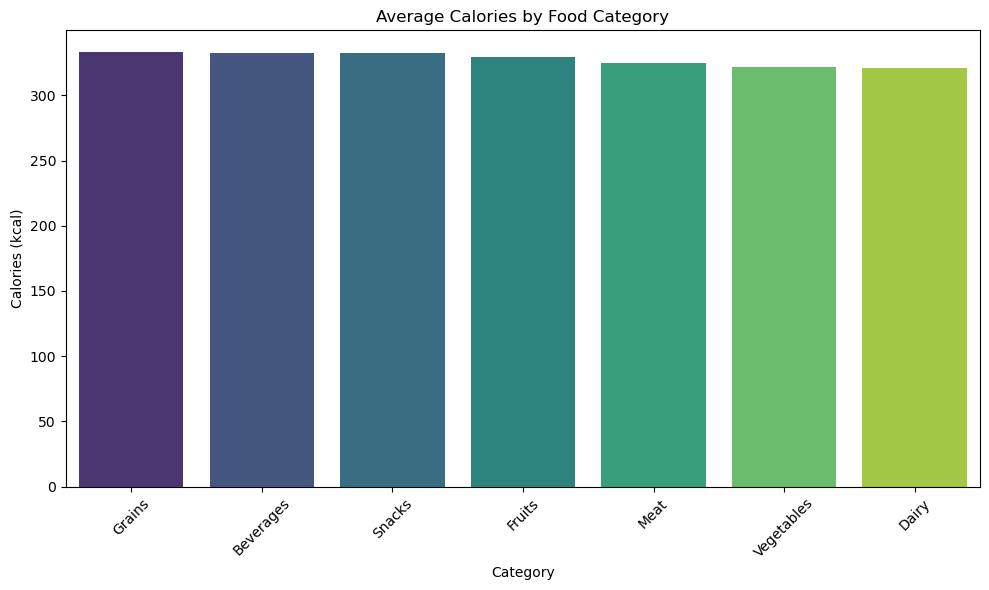

In [19]:
# Plot 1: Average Calories by Food Category
plt.figure(figsize=(10,6))
sns.barplot(data=df_nutrition.groupby('Category', as_index=False)['Calories (kcal)'].mean().sort_values('Calories (kcal)', ascending=False),
            x='Category', y='Calories (kcal)', palette='viridis')
plt.title('Average Calories by Food Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2. Macronutrient Distribution by Meal Type
This grouped bar plot shows the average protein, carbohydrates, and fat for each meal type, helping to understand macronutrient balance across meals.

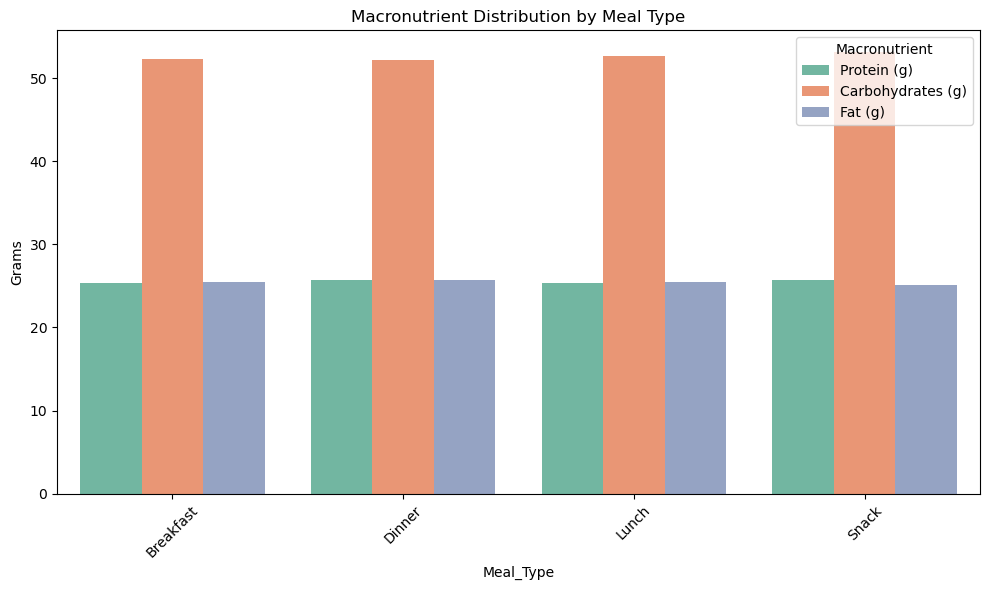

In [20]:
# Plot 2: Macronutrient Distribution by Meal Type
macros = df_nutrition.groupby('Meal_Type')[['Protein (g)', 'Carbohydrates (g)', 'Fat (g)']].mean().reset_index()
macros_melted = macros.melt(id_vars='Meal_Type', var_name='Macronutrient', value_name='Grams')
plt.figure(figsize=(10,6))
sns.barplot(data=macros_melted, x='Meal_Type', y='Grams', hue='Macronutrient', palette='Set2')
plt.title('Macronutrient Distribution by Meal Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3. Water Intake Distribution by User
This boxplot visualizes the distribution of water intake (ml) for each user, highlighting hydration habits and outliers.

2025-11-05 11:51:39,938 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-11-05 11:51:39,977 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


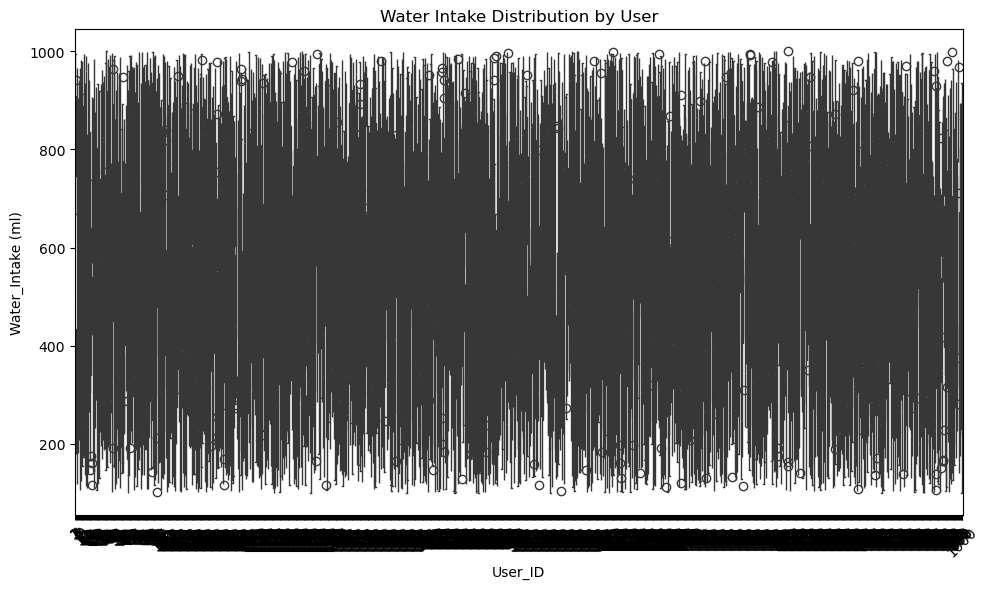

In [21]:
# Plot 3: Water Intake Distribution by User
plt.figure(figsize=(10,6))
sns.boxplot(data=df_nutrition, x='User_ID', y='Water_Intake (ml)', palette='coolwarm')
plt.title('Water Intake Distribution by User')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4. Top 10 Foods by Average Calories
This horizontal bar plot displays the top 10 foods with the highest average calories, useful for identifying calorie-dense items.

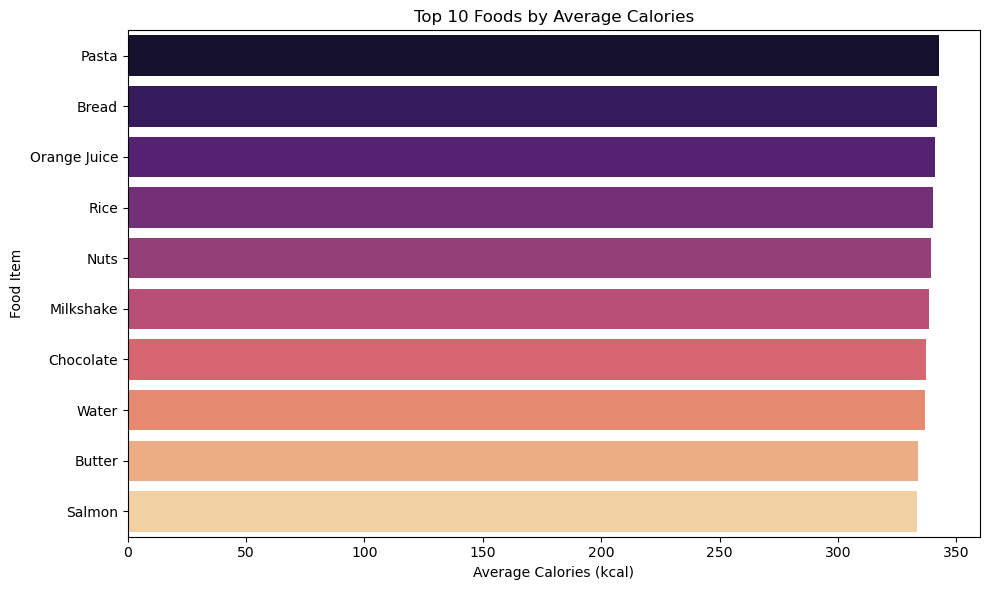

In [23]:
# Plot 4: Top 10 Foods by Average Calories
top_foods = df_nutrition.groupby('Food_Item')['Calories (kcal)'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_foods.values, y=top_foods.index, palette='magma')
plt.title('Top 10 Foods by Average Calories')
plt.xlabel('Average Calories (kcal)')
plt.ylabel('Food Item')
plt.tight_layout()
plt.show()

## 5. Correlation Heatmap of Nutritional Values
This heatmap visualizes the correlations between calories, protein, carbs, fat, fiber, sugars, sodium, cholesterol, and water intake, revealing relationships among nutritional metrics.

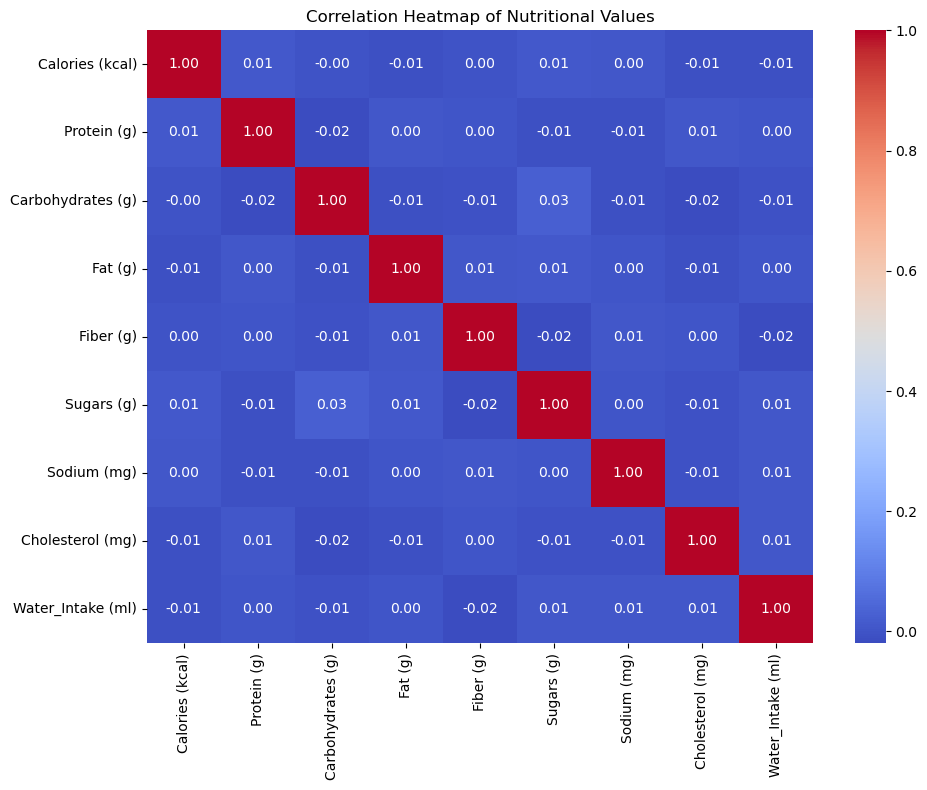

In [24]:
# Plot 5: Correlation Heatmap of Nutritional Values
corr_cols = ['Calories (kcal)', 'Protein (g)', 'Carbohydrates (g)', 'Fat (g)', 'Fiber (g)', 'Sugars (g)', 'Sodium (mg)', 'Cholesterol (mg)', 'Water_Intake (ml)']
corr_matrix = df_nutrition[corr_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Nutritional Values')
plt.tight_layout()
plt.show()

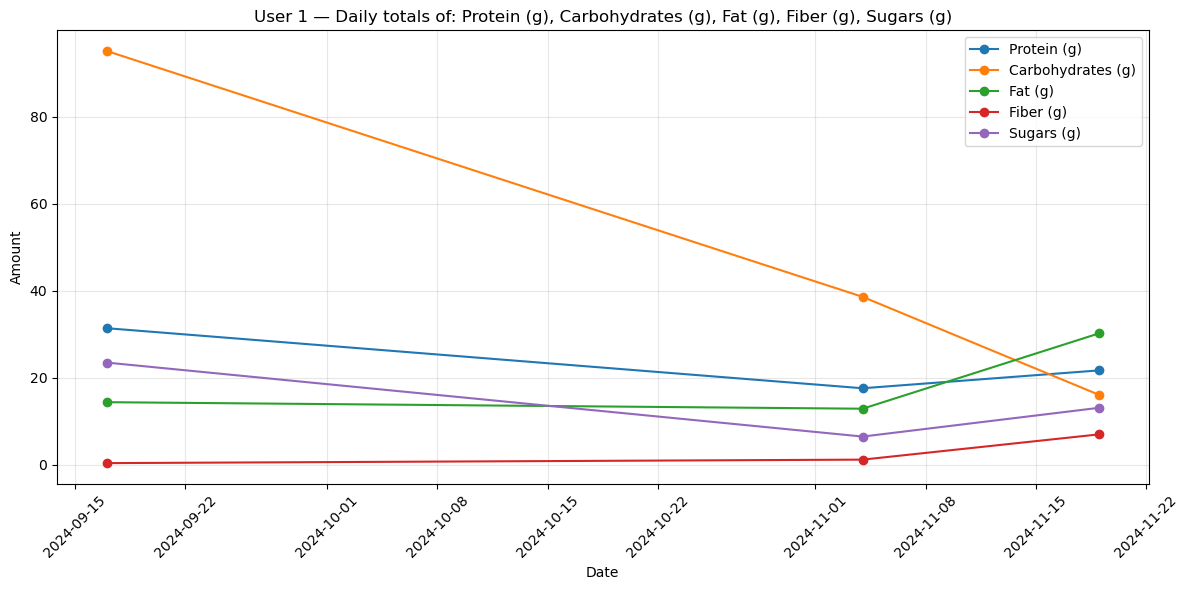

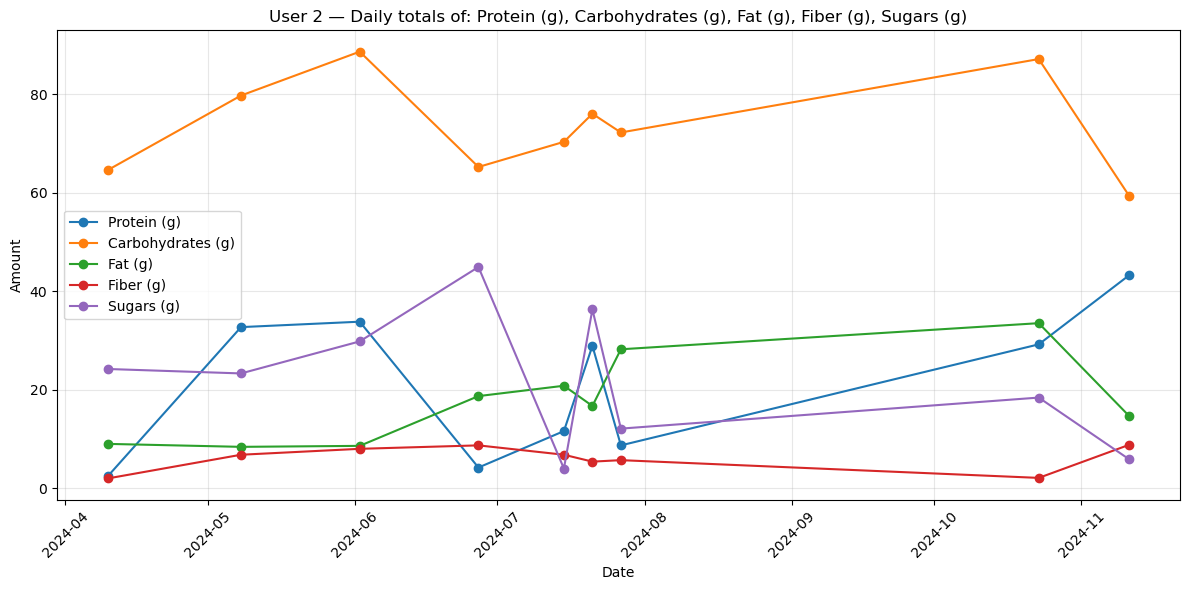

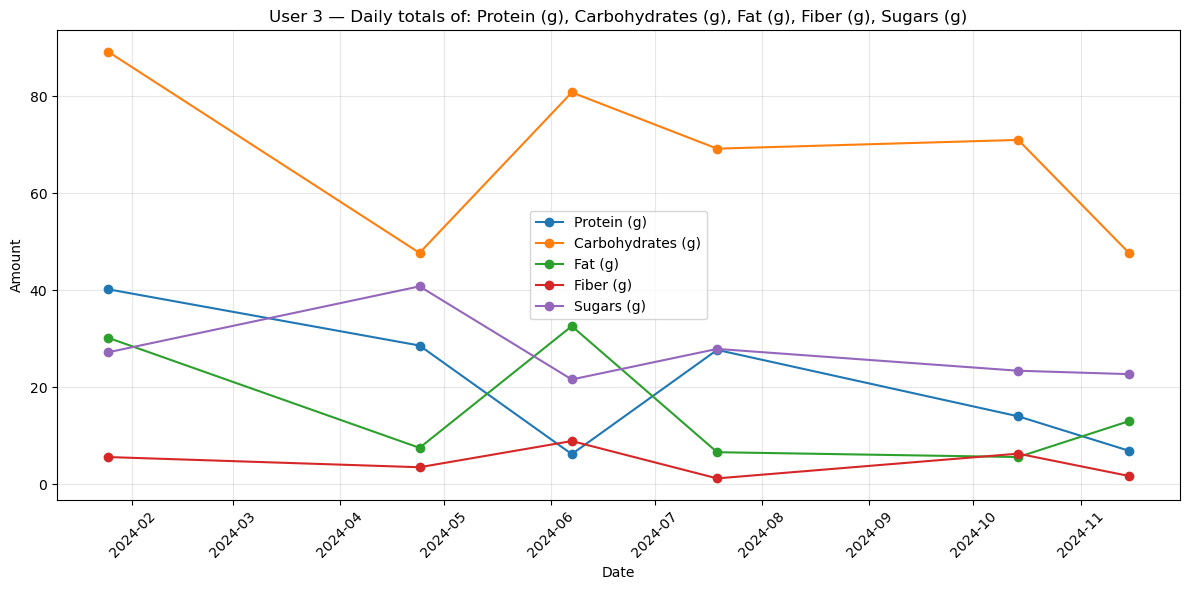

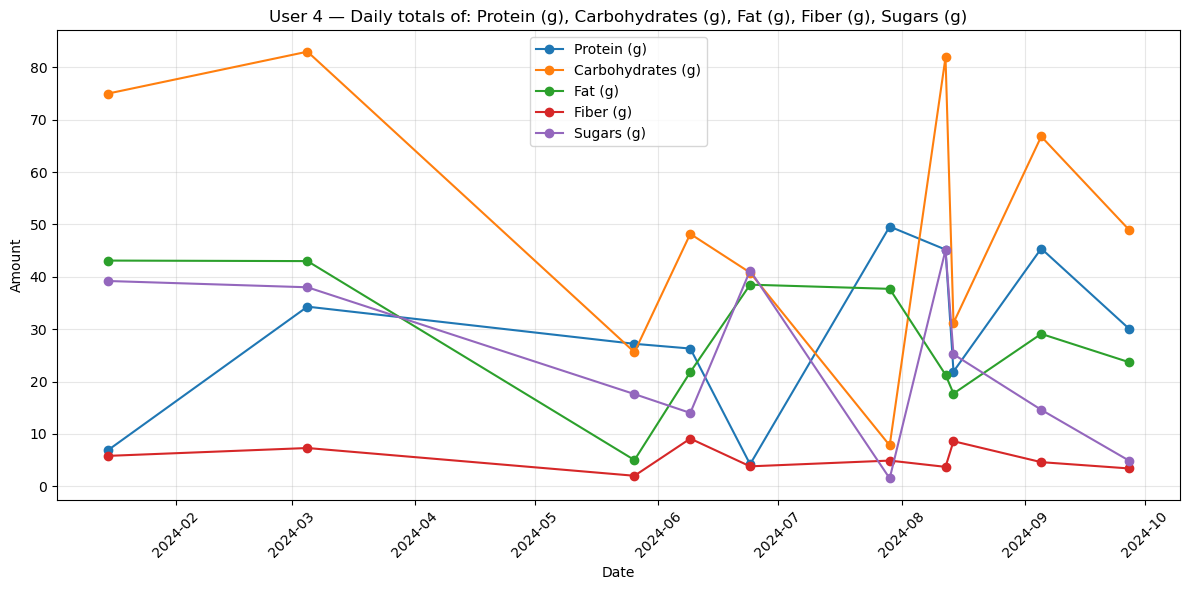

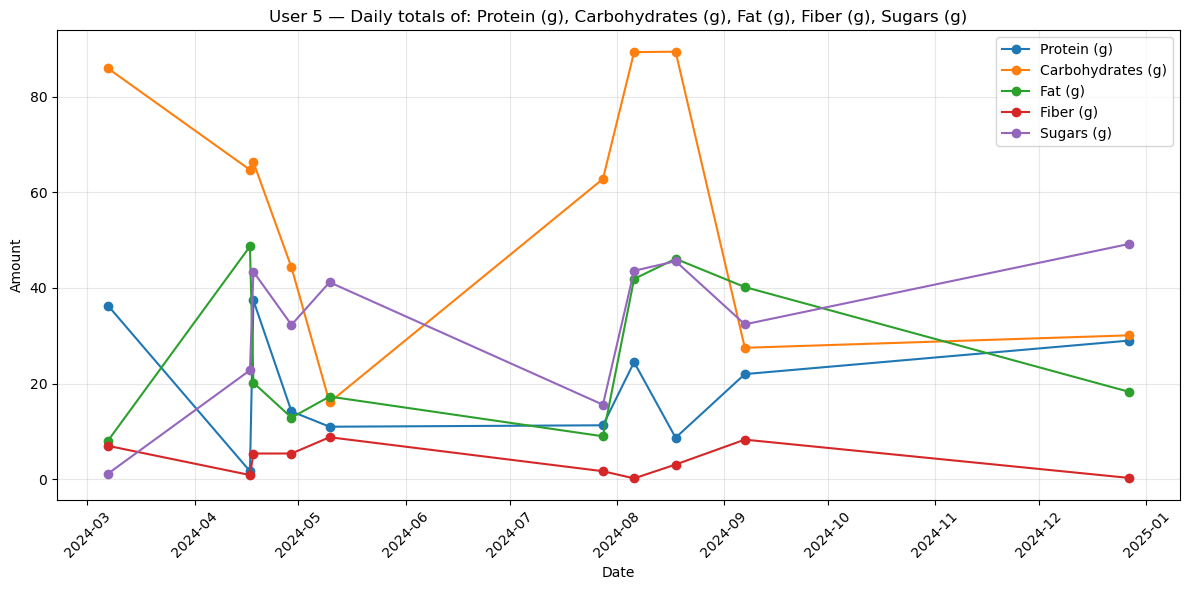

In [39]:
def plot_user_nutrients(user_id: int, nutrients: List[str], df: pd.DataFrame = df_nutrition) -> None:
	"""
	Plot specified nutrient columns per date for a given user_id.

	Parameters
	- user_id: int | the User_ID to filter on
	- nutrients: List[str] | list of column names in df to plot (e.g. ['Calories (kcal)', 'Protein (g)'])
	- df: pd.DataFrame | dataframe to use (defaults to df_nutrition)

	Notes
	- The function groups rows by Date for the user and sums nutrient values per date (daily totals).
	- Date parsing is done on a copy and the original df is not modified.
	"""
	# Normalize nutrients input
	if isinstance(nutrients, str):
		nutrients = [nutrients]

	# Validate columns
	missing = [c for c in nutrients if c not in df.columns]
	if missing:
		raise ValueError(f"The following nutrient columns are not present in the dataframe: {missing}")

	# Filter user data
	df_user = df[df['User_ID'] == user_id].copy()
	if df_user.empty:
		raise ValueError(f"No data found for user_id={user_id}")

	# Ensure Date is datetime and aggregate per date (daily totals)
	df_user['Date'] = pd.to_datetime(df_user['Date'], errors='coerce')
	df_user = df_user.dropna(subset=['Date'])
	if df_user.empty:
		raise ValueError("User data contains no valid Date values after parsing.")

	daily = df_user.groupby('Date', as_index=False)[nutrients].sum().sort_values('Date')

	# Plot
	plt.figure(figsize=(12, 6))
	for col in nutrients:
		plt.plot(daily['Date'], daily[col], marker='o', label=col)

	plt.title(f"User {user_id} — Daily totals of: {', '.join(nutrients)}")
	plt.xlabel("Date")
	plt.ylabel("Amount")
	plt.grid(alpha=0.3)
	plt.legend()
	plt.xticks(rotation=45)
	plt.tight_layout()
	plt.show()
 
 
all_nutr = ['Protein (g)', 'Carbohydrates (g)', 'Fat (g)', 'Fiber (g)', 'Sugars (g)']

for i in range(5):
    plot_user_nutrients(user_id=i+1, nutrients=all_nutr)

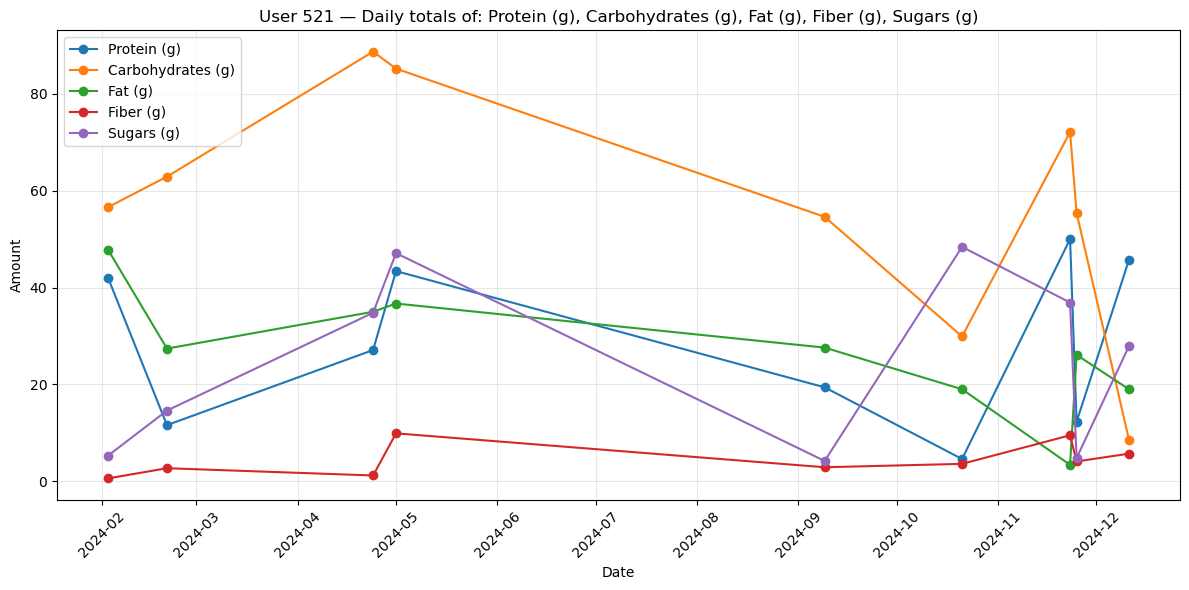

In [36]:
plot_user_nutrients(user_id=521, nutrients=all_nutr)

In [31]:
mask = df_nutrition['Protein (g)'].max()
df_nutrition[df_nutrition['Protein (g)'] == mask]

,Date,User_ID,Food_Item,Category,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Meal_Type,Water_Intake (ml)
117,2024-01-28,663,Beef Steak,Meat,537,50.0,96.3,23.6,5.4,42.6,142,63,Dinner,831
2083,2024-11-23,521,Water,Beverages,294,50.0,72.1,3.4,9.5,36.9,624,261,Snack,535
2354,2024-02-24,46,Chips,Snacks,238,50.0,43.4,8.4,0.9,34.8,423,256,Breakfast,412
2615,2024-05-15,189,Broccoli,Vegetables,165,50.0,60.4,35.5,9.4,32.5,165,252,Snack,567
4397,2024-10-21,926,Banana,Fruits,332,50.0,20.0,8.5,9.4,22.0,139,171,Snack,713
4788,2024-07-20,113,Cookies,Snacks,502,50.0,92.7,42.4,8.6,36.6,416,188,Breakfast,324
5514,2024-06-29,236,Chicken Breast,Meat,440,50.0,87.3,45.3,5.3,13.2,256,58,Lunch,425
7570,2024-12-16,971,Chocolate,Snacks,413,50.0,67.0,20.4,1.2,41.1,594,237,Snack,323
7848,2024-11-11,795,Water,Beverages,154,50.0,23.9,46.0,2.4,9.0,808,193,Dinner,716
9418,2024-05-27,136,Cheese,Dairy,589,50.0,17.8,7.0,8.4,12.2,640,77,Snack,464
